In [ ]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.






In [ ]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.




Training MSE: 22.12
Recent Data MSE (drifted): 24.37

Mean Difference: 12.67
Std Dev Difference: 5.26

KS Test p-value: 0.0000
⚠️ Significant data drift detected.


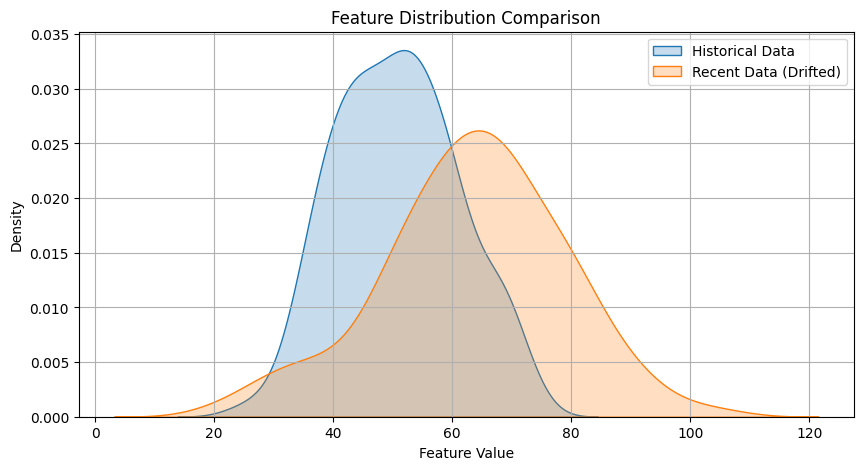

🧪 DATA VALIDATION REPORT
----------------------------------------
🔍 Missing Values by Column:
Name     1
Email    1
Phone    1
dtype: int64

⚠️ Empty or Whitespace-only Strings by Column:
Name     1
Phone    1
dtype: int64

📄 Duplicate Rows: 0

🔑 CustomerID Unique: ❌ No

📧 Invalid Email Format Entries: 2
📱 Invalid Phone Numbers: 2
----------------------------------------
✅ Validation Completed



/tmp/ipykernel_38036/1718299764.py:88: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_strings = (df.astype(str).applymap(lambda x: str(x).strip() == '')).sum()


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ks_2samp

# -------------------------------
# Task 1: Understanding Data Drift
# -------------------------------
np.random.seed(0)

# Historical training data
X_train = np.random.normal(50, 10, 200).reshape(-1, 1)
y_train = 2.5 * X_train.flatten() + np.random.normal(0, 5, size=200)

# Recent (drifted) data
X_recent = np.random.normal(65, 15, 200).reshape(-1, 1)
y_recent = 2.5 * X_recent.flatten() + np.random.normal(0, 5, size=200)

# Train model on historical data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on both
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_recent = mean_squared_error(y_recent, model.predict(X_recent))

print(f"Training MSE: {mse_train:.2f}")
print(f"Recent Data MSE (drifted): {mse_recent:.2f}")

# -------------------------------
# Task 2: Monitoring Distribution Changes
# -------------------------------
mean_diff = np.abs(np.mean(X_train) - np.mean(X_recent))
std_diff = np.abs(np.std(X_train) - np.std(X_recent))

print(f"\nMean Difference: {mean_diff:.2f}")
print(f"Std Dev Difference: {std_diff:.2f}")

ks_stat, ks_pval = ks_2samp(X_train.flatten(), X_recent.flatten())
print(f"\nKS Test p-value: {ks_pval:.4f}")
if ks_pval < 0.05:
    print("⚠️ Significant data drift detected.")
else:
    print("✅ No significant data drift detected.")

# -------------------------------
# Task 3: Visualizing Data Drift
# -------------------------------
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train.flatten(), label='Historical Data', fill=True)
sns.kdeplot(X_recent.flatten(), label='Recent Data (Drifted)', fill=True)
plt.title('Feature Distribution Comparison')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd
import numpy as np
import re

# Sample dataset
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 3],  # duplicate ID to test uniqueness
    'Name': ['Alice', 'Bob', '  ', None],
    'Email': ['a@example.com', 'b@example.com', 'invalid_email', None],
    'Phone': ['1234567890', None, '9876543210', '']
})

# ------------------------------------------
# Function: Automated Data Validation Checks
# ------------------------------------------
def run_data_validation(df):
    print("🧪 DATA VALIDATION REPORT")
    print("-" * 40)
    
    # 1. Check for missing values
    missing = df.isnull().sum()
    print("🔍 Missing Values by Column:")
    print(missing[missing > 0])
    
    # 2. Check for empty strings and whitespace-only
    empty_strings = (df.astype(str).applymap(lambda x: str(x).strip() == '')).sum()
    print("\n⚠️ Empty or Whitespace-only Strings by Column:")
    print(empty_strings[empty_strings > 0])
    
    # 3. Check for duplicate rows
    dup_rows = df.duplicated().sum()
    print(f"\n📄 Duplicate Rows: {dup_rows}")
    
    # 4. Check for unique primary key column (e.g., CustomerID)
    if 'CustomerID' in df.columns:
        unique_ids = df['CustomerID'].is_unique
        print(f"\n🔑 CustomerID Unique: {'✅ Yes' if unique_ids else '❌ No'}")
    
    # 5. Regex check for email format
    def valid_email(email):
        pattern = r'^[\w\.-]+@[\w\.-]+\.\w{2,4}$'
        return bool(re.match(pattern, str(email)))
    
    email_invalid = df['Email'].apply(lambda x: not valid_email(x)).sum()
    print(f"\n📧 Invalid Email Format Entries: {email_invalid}")
    
    # 6. Optional: Check for phone number length or numeric
    invalid_phones = df['Phone'].apply(lambda x: not (str(x).isdigit() and len(str(x)) == 10)).sum()
    print(f"📱 Invalid Phone Numbers: {invalid_phones}")
    
    print("-" * 40)
    print("✅ Validation Completed\n")

# Run validation
run_data_validation(df)
